In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from plotData import *
from mapFeature import *
from costFunctionReg import *
from plotDecisionBoundary import *
from predict import *

In [68]:
data=pd.read_csv('data_reg-logistic.txt',sep=',',header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [69]:
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [70]:
# The first two columns contains the X values and the third column contains the label (y). 
X,y=data.values[:,:2],data.values[:,-1][:,np.newaxis]
# Add intercept term
X=np.column_stack((np.ones(X.shape[0]),X))

# VISUALIZE DATA

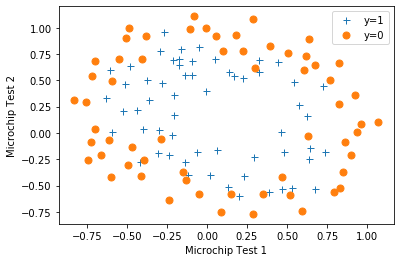

In [71]:
plotData(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'])

# FEATURE MAPPING

In [72]:
# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
degree=6
X_poly=mapFeature(X[:,1],X[:,2],degree)

# COST FUNCTION AND GRADIENT

In [73]:
# Initialize fitting parameters
theta_ini=np.zeros(X_poly.shape[1])
# Set regularization parameter lambda to 1
Lambda=1
# Compute and display initial cost and gradient for regularized logistic regression
J_ini,grad_ini=costFunctionReg(theta_ini,X_poly,y,Lambda)
print('Cost at initial theta (zeros):',J_ini)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:',grad_ini[:5])
print('Expected gradients (approx) - first five values only: 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only: 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [74]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta=np.ones(X_poly.shape[1])
test_J,test_grad=costFunctionReg(test_theta,X_poly,y,10)
print('Cost at test theta (with lambda = 10):',J_ini)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:',grad_ini[:5])
print('Expected gradients (approx) - first five values only:\n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

Cost at test theta (with lambda = 10): 0.6931471805599453
Expected cost (approx): 3.16
Gradient at test theta - first five values only: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


# LEARNING

d:\Oliv\computer\programming\AI\training\MOOC\Coursera_Stanford_Andrew-Ng\Git\machine-learning_Coursera_Stanford\logistic-regression\python\plotDecisionBoundary.py:28: UserWarning: The following kwargs were not used by contour: 'linewidth'
  line=plt.contour(u,v,z,0,**kwargs)


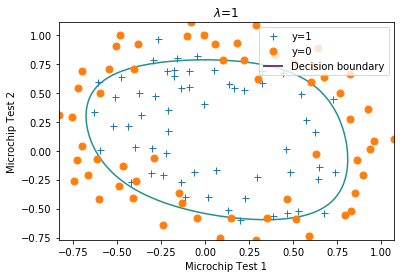

In [75]:
# Set regularization parameter lambda to 1
Lambda=1
# Optimize
res=optimize.minimize(costFunctionReg,theta_ini,args=(X_poly,y,Lambda),method='Newton-CG',jac=True,options={'maxiter':1000})
theta_fin=res.x
# Plot Boundary
line_y1,line_y2=plotData(X,y)
line_bound=plotDecisionBoundary(theta_fin,X_poly,y,degree,linewidth=2)
plt.title('$\lambda$=%d'%Lambda)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend((line_y1[0],line_y2[0],line_bound.collections[0]),('y=1','y=0','Decision boundary'),loc='upper right')

In [76]:
_,p=predict(theta_fin,X_poly)
print('Train Accuracy: %.2f'%(np.mean(p==y)*100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy: 83.05
Expected accuracy (with lambda = 1): 83.1 (approx)


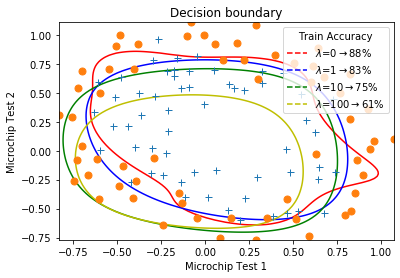

In [77]:
plotData(X,y)
Lambda=np.array([0,1,10,100])
colors=np.array(['r','b','g','y'])
p=np.zeros_like(Lambda)
lines=[]
labels=[]
for i,ilambda in enumerate(Lambda):
    res=optimize.minimize(costFunctionReg,theta_ini,args=(X_poly,y,ilambda),method='Newton-CG',jac=True,options={'maxiter':1000})
    theta_fin=res.x
    cs=plotDecisionBoundary(theta_fin,X_poly,y,degree,colors=colors[i])
    lines.append(cs.collections[0])
    labels.append('$\lambda$='+str(ilambda)+r'$\rightarrow$'+str('%.0f' % (100*np.mean(predict(theta_fin,X_poly)[1]==y)))+'%')
plt.title('Decision boundary')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(lines,labels,title='Train Accuracy',loc='upper right')

# ADVANCED OPTIMIZATION ALGORITHMS

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X_poly[:,1:],y,test_size=0.5)

In [94]:
def multiPlotDecisionBoundary(X_train,y_train,X_test,y_test,set=None):
    Lambda=np.array([0.00001,1,10,100])
    colors=np.array(['r','b','g','y'])
    lines=[]
    labels=[]
    for i,ilambda in enumerate(Lambda):
        clf=LogisticRegression(C=1/ilambda,solver='newton-cg')
        clf.fit(X_train,np.ravel(y_train))
        theta=np.hstack((clf.intercept_,np.ravel(clf.coef_)))
        cs=plotDecisionBoundary(theta,X_poly,y,degree,colors=colors[i])
        lines.append(cs.collections[0])
        labels.append('$\lambda$='+str('%.0f' % ilambda)+r'$\rightarrow$'+str('%.0f' % (100*clf.score(X_test,y_test)))+'%')
    plt.title('Decision boundary (%s set)'%set)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(lines,labels,title=set+' Accuracy',loc='upper right')

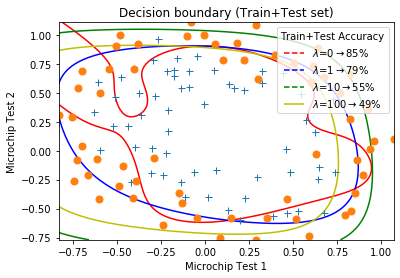

In [95]:
plotData(X,y)
multiPlotDecisionBoundary(X_train,y_train,X_poly[:,1:],y,set='Train+Test')

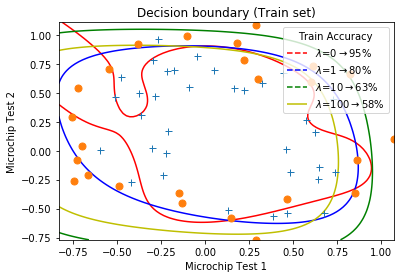

In [96]:
plotData(np.column_stack((np.ones(X_train.shape[0]),X_train[:,:2])),y_train)
multiPlotDecisionBoundary(X_train,y_train,X_train,y_train,set='Train')

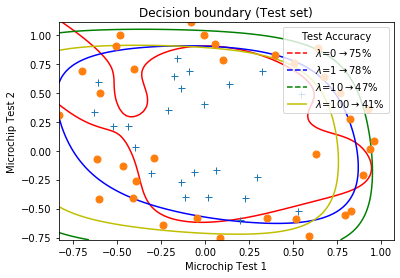

In [97]:
plotData(np.column_stack((np.ones(X_test.shape[0]),X_test[:,:2])),y_test)
multiPlotDecisionBoundary(X_train,y_train,X_test,y_test,set='Test')